Make the required imports before we use the packages.

In [1]:
from nba_api.stats.endpoints import playergamelog, commonallplayers, commonplayerinfo
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import time

Let's get a list of all active players.

In [2]:
season = '2023-24'
allPlayers = commonallplayers.CommonAllPlayers(season=season, is_only_current_season=0, timeout=60).get_dict()
activePlayers = []

for player in allPlayers['resultSets'][0]['rowSet']:
	if player[3] == 1:
		activePlayers.append(player)

Let's get the age of each of these players, as well as how many fantasy points they have scored last season.

This filters through the list of active players and looks for players who have at least played one game last season.

In [4]:
startdate = datetime(2023, 10, 1)
ageMap = defaultdict(list)

for player in activePlayers:
	time.sleep(3.5)

	gameLog = playergamelog.PlayerGameLog(player_id=player[0], season=season, timeout=120).get_dict()
	fpoints = []

	if len(gameLog['resultSets'][0]['rowSet']) == 0:
		continue

	playerInfo = commonplayerinfo.CommonPlayerInfo(player[0], timeout=120).get_dict()
	birthdate = playerInfo['resultSets'][0]['rowSet'][0][7]
	birthdate = datetime.strptime(birthdate, "%Y-%m-%dT%H:%M:%S")
	age = startdate.year - birthdate.year - ((startdate.month, startdate.day) < (birthdate.month, birthdate.day))

	for game in gameLog['resultSets'][0]['rowSet']:
		fieldGoalsMade = 2 * game[7]
		fieldGoalsAttempted = -1 * game[8]
		threePointersMade = game[10]
		freeThrowsMade = game[13]
		freeThrowsAttempted = -1 * game[14]
		rebounds = game[18]
		assists = 2 * game[19]
		steals = 4 * game[20]
		blocks = 4 * game[21]
		turnovers = -2 * game[22]
		points = game[24]
		fpoints.append(
			fieldGoalsMade + fieldGoalsAttempted +
			freeThrowsMade + freeThrowsAttempted +
			threePointersMade +
			rebounds + assists +
			steals + blocks +
			turnovers + points
		)

	ageMap[age].append(sum(fpoints))
	print(player[2], '->', sum(fpoints), '=>', age)

Precious Achiuwa -> 1520 => 24
Bam Adebayo -> 2887 => 26
Ochai Agbaji -> 1039 => 23
Santi Aldama -> 1531 => 22
Nickeil Alexander-Walker -> 1554 => 25
Grayson Allen -> 2214 => 27
Jarrett Allen -> 2934 => 25
Jose Alvarado -> 975 => 25
Kyle Anderson -> 1667 => 30
Giannis Antetokounmpo -> 4250 => 28
Thanasis Antetokounmpo -> 95 => 31
Cole Anthony -> 1828 => 23
OG Anunoby -> 1476 => 26
Deni Avdija -> 2304 => 22
Deandre Ayton -> 1995 => 25
Udoka Azubuike -> 92 => 24
Ibou Badji -> 173 => 20
Marvin Bagley III -> 1148 => 24
Amari Bailey -> 42 => 19
Patrick Baldwin Jr. -> 428 => 20
LaMelo Ball -> 1000 => 22
Mo Bamba -> 828 => 25
Paolo Banchero -> 3036 => 20
Desmond Bane -> 1738 => 25
Dalano Banton -> 984 => 23
Dominick Barlow -> 404 => 20
Harrison Barnes -> 1667 => 31
Scottie Barnes -> 2731 => 22
RJ Barrett -> 1830 => 23
Charles Bassey -> 268 => 22
Emoni Bates -> 59 => 19
Keita Bates-Diop -> 530 => 27
Nicolas Batum -> 1131 => 34
Darius Bazley -> 132 => 23
Bradley Beal -> 1875 => 30
Malik Beasley

Let's plot the graph.

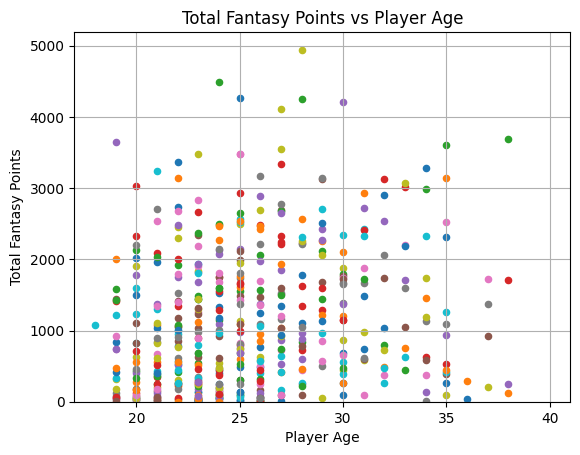

In [5]:
for key in ageMap.keys():
	for listitem in ageMap[key]:
		plt.scatter(key, listitem, s=20)
plt.grid(True)
plt.title("Total Fantasy Points vs Player Age")
plt.xlabel("Player Age")
plt.ylabel("Total Fantasy Points")
plt.xlim(left=17, right=41)
plt.ylim(bottom=0)
plt.show()